In [7]:
from google.colab import output
output.clear()


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [10]:
import zipfile
import os
data = zipfile.ZipFile('archive (6).zip')
data.extractall()
data.close()



In [13]:
for dirpath, dirnames, filenames in os.walk("archive (6)"):
  print("There are ", len(dirnames), "directories and", len(filenames),"images in ", (dirpath))

In [16]:
train_dir = '/content/Training'
test_dir = '/content/Testing'


train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                  label_mode = 'categorical',
                                                                  image_size = (224, 224))

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size = (224,224),
                                                                shuffle = False)

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


In [24]:
from keras.layers.serialization import activation
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing

efficient_net_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

base_model = tf.keras.applications.EfficientNetB0(include_top = False)
inputs = layers.Input(shape = (224,224,3), name = 'Input_layer')
x = base_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
outputs  = layers.Dense(len(train_data.class_names), activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

history = model.fit(
    train_data,
    epochs = 5,
    validation_data=test_data,
    validation_steps=int(0.15 * len(test_data))
)

Epoch 1/5
90/90 [==============================] - 575s 6s/step - loss: 0.3589 - accuracy: 0.8666 - val_loss: 7.0078 - val_accuracy: 0.2188
Epoch 2/5
90/90 [==============================] - 555s 6s/step - loss: 0.1265 - accuracy: 0.9578 - val_loss: 6.5326 - val_accuracy: 0.2188
Epoch 3/5
90/90 [==============================] - 532s 6s/step - loss: 0.0737 - accuracy: 0.9767 - val_loss: 10.5615 - val_accuracy: 0.0312
Epoch 4/5
90/90 [==============================] - 727s 8s/step - loss: 0.0584 - accuracy: 0.9798 - val_loss: 8.9257 - val_accuracy: 0.0625
Epoch 5/5
90/90 [==============================] - 482s 5s/step - loss: 0.0525 - accuracy: 0.9833 - val_loss: 9.4871 - val_accuracy: 0.0625


<Axes: >

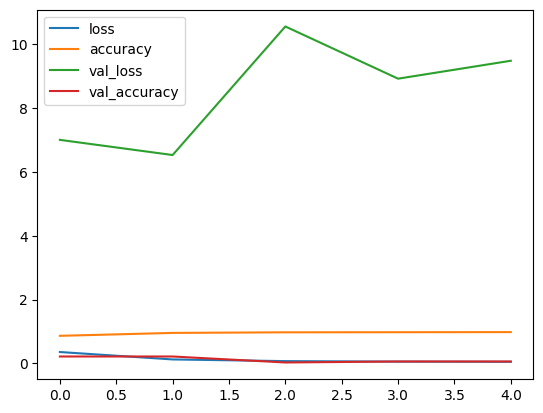

In [27]:
pd.DataFrame(history.history).plot()